In [1]:
# Importing Liberaries:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Loading Dataset
df= pd.read_csv('heart_attack_risk_analysis.csv')

# 1- Data Assessing:

In [3]:
#Loading a sample of the 1st 15 coulmns:
df.head().iloc[:,:15]

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,1,7.807690,Unhealthy,0,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,0,17.297628,Average,1,0
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,1,8.695288,Average,1,1
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,1,10.161587,Healthy,0,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,1,16.436787,Healthy,1,0


In [4]:
#Loading a sample of the last 15 coulmns:
df.head().iloc[:,15:]

,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,2,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,8,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,3,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,7,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,1,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7010 non-null   object 
 1   Age                              7010 non-null   int64  
 2   Sex                              7010 non-null   object 
 3   Cholesterol                      7010 non-null   int64  
 4   Blood Pressure                   7010 non-null   object 
 5   Heart Rate                       7010 non-null   int64  
 6   Diabetes                         7010 non-null   int64  
 7   Family History                   7010 non-null   int64  
 8   Smoking                          7010 non-null   int64  
 9   Obesity                          7010 non-null   int64  
 10  Alcohol Consumption              7010 non-null   int64  
 11  Exercise Hours Per Week          7010 non-null   float64
 12  Diet                

In [6]:
# General Charcteristics:
print('General Charcteristics of the dataset:\n')

# Shape:
print(f'  - The dataset has a shape of : {df.shape[0]} Rows and {df.shape[1]} Columns\n')

# Null Values:
nulls= df.isna().sum().sum()
if nulls == 0:
    print('  - No NULL values in this dataset\n')
else:
    print(f'  - This dataset contains {nulls} Null Values\n')

# Duplicates:
duplicates = df.duplicated().sum()
if duplicates == 0:
    print('  - No Duplicates in this dataset\n')
else:
    print(f'  - {duplicates} Rows are Duplicated\n')

General Charcteristics of the dataset:

  - The dataset has a shape of : 7010 Rows and 26 Columns

  - No NULL values in this dataset

  - No Duplicates in this dataset



In [7]:
# Number of unique values:
print(f'The number of unique value in each column:\n{df.nunique()}')

The number of unique value in each column:
Patient ID                         7010
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3590
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            7010
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            7010
Income                             6921
BMI                                7010
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                            

In [8]:
# Overview:
print('Dataset Overview:\n- Total number of patients: {} Patient.'\
      .format(df['Patient ID'].count()))

print('\n- Ages are between {} & {} years.'\
      .format(df['Age'].min(),df['Age'].max()))

print('\n- Patients are classified into {}s & {}s.'\
      .format(df['Sex'].unique()[0],df['Sex'].unique()[1]))

print('\n- Cholesterol Levels are between {} mg/dL and {} mg/dL.'\
      .format(df['Cholesterol'].min(),df['Cholesterol'].max()))

print('\n- Heart Rates are between {} beats/min and {} beats/min.'\
      .format(df['Heart Rate'].min(),df['Heart Rate'].max()))

print('\n- Non-Diabetic patients are classified as {} & Daiabetic patients as {}.'\
      .format(df['Diabetes'].unique()[0],df['Diabetes'].unique()[1]))

print('\n- Patients with No Family Related Hearts Problems are classified as {} & those With Family Related Heart Problems as {}.'\
      .format(df['Family History'].unique()[1],df['Family History'].unique()[0]))

print('\n- Non-Smokers are classified as {} & Smokers as {}.'\
      .format(df['Smoking'].unique()[1],df['Smoking'].unique()[0]))

print('\n- Not-Obese Patients are classified as {} & Obese Patients as {}.'\
      .format(df['Obesity'].unique()[1],df['Obesity'].unique()[0]))

print('\n- Patients\' Alcohol consumption is classified into {} as YES & {} as NO.'\
      .format(df['Alcohol Consumption'].unique()[0],df['Alcohol Consumption'].unique()[1]))

print('\n- Patients\' Exercise Hours are between {} hrs/week & {} hrs/week.'\
      .format(df['Exercise Hours Per Week'].round(4).min(),df['Exercise Hours Per Week'].round(4).max()))

print('\n- Patients\' Diets are clasified as {}, {}, & {}.'\
      .format(df['Diet'].unique()[0],df['Diet'].unique()[1],df['Diet'].unique()[2]))

print('\n- Patients\' Previous Heart Problems are classified into {} as YES & {} as NO.'\
      .format(df['Previous Heart Problems'].unique()[1],df['Previous Heart Problems'].unique()[0]))

print('\n- Patients\' Medication Use is classified into {} as YES & {} as NO.'\
      .format(df['Medication Use'].unique()[0],df['Medication Use'].unique()[1]))

print('\n- Patients\' Stress levels are between {} "The Lowest" & {} "The Highest".'\
      .format(df['Stress Level'].min(),df['Stress Level'].max()))

print('\n- Patients\' Sedentary Hours Per Day are between {} hrs/day & {} hrs/day.'\
      .format(df['Sedentary Hours Per Day'].round(4).min(),df['Sedentary Hours Per Day'].round(4).max()))

print('\n- Patients\' Incomes are between {} & {}.'\
      .format(df['Income'].min(),df['Income'].max()))

print('\n- Patients\' Body Mass Indecies (BMI) are between {} & {}.'\
      .format(df['BMI'].round(4).min(),df['BMI'].round(4).max()))

print('\n- Patients\' Triglycerides are between {} mg/dL & {} mg/dL.'\
      .format(df['Triglycerides'].min(),df['Triglycerides'].max()))

print('\n- Patients\' Physical Activity Days Per Week are between {} days/week & {} days/week.'\
      .format(df['Physical Activity Days Per Week'].min(),df['Physical Activity Days Per Week'].max()))

print('\n- Patients\' Sleep Hours Per Day are between {} hrs/day & {} hrs/day.'\
      .format(df['Sleep Hours Per Day'].min(),df['Sleep Hours Per Day'].max()))

print('\n- Patients are from {} different Countries in {} different Continents.'\
      .format(df['Country'].nunique(),df['Continent'].nunique()))

print('\n- Each patient\'s location is determined whether he is in the {} or the {}.'\
      .format(df['Hemisphere'].unique()[0],df['Hemisphere'].unique()[1]))

print('\n- Heart Attack Risk for each patient is classified either by {} for YES or {} for NO.'\
      .format(df['Heart Attack Risk'].unique()[0], df['Heart Attack Risk'].unique()[1]))

Dataset Overview:
- Total number of patients: 7010 Patient.

- Ages are between 18 & 90 years.

- Patients are classified into Males & Females.

- Cholesterol Levels are between 120 mg/dL and 400 mg/dL.

- Heart Rates are between 40 beats/min and 110 beats/min.

- Non-Diabetic patients are classified as 0 & Daiabetic patients as 1.

- Patients with No Family Related Hearts Problems are classified as 0 & those With Family Related Heart Problems as 1.

- Non-Smokers are classified as 0 & Smokers as 1.

- Not-Obese Patients are classified as 0 & Obese Patients as 1.

- Patients' Alcohol consumption is classified into 1 as YES & 0 as NO.

- Patients' Exercise Hours are between 0.0024 hrs/week & 19.9987 hrs/week.

- Patients' Diets are clasified as Unhealthy, Average, & Healthy.

- Patients' Previous Heart Problems are classified into 1 as YES & 0 as NO.

- Patients' Medication Use is classified into 1 as YES & 0 as NO.

- Patients' Stress levels are between 1 "The Lowest" & 10 "The Highest

In [9]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.00000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,53.510414,259.880742,75.105991,0.652782,0.491869,0.896291,0.499857,0.595863,9.979109,0.498146,0.500143,5.451783,5.994007,158245.34893,28.878692,416.782026,3.491583,7.024822,0.357204
std,21.290957,80.709248,20.507160,0.476120,0.499970,0.304904,0.500036,0.490759,5.769721,0.500032,0.500036,2.857989,3.472022,80585.31666,6.322401,224.195136,2.281077,1.990908,0.479210
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.00000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.046024,0.000000,0.000000,3.000000,2.971831,88368.00000,23.422280,221.000000,2.000000,5.000000,0.000000
50%,53.000000,259.000000,75.000000,1.000000,0.000000,1.000000,0.000000,1.000000,9.982968,0.000000,1.000000,5.000000,5.936919,157378.50000,28.737627,416.000000,3.000000,7.000000,0.000000
75%,72.000000,329.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.029659,1.000000,1.000000,8.000000,9.017592,227218.50000,34.321158,613.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.00000,39.993581,800.000000,7.000000,10.000000,1.000000


In [10]:
df_stats= df.describe()\
.loc[:,['Age', 'Cholesterol','Heart Rate','Exercise Hours Per Week','Stress Level','Sedentary Hours Per Day','Income','BMI','Triglycerides','Physical Activity Days Per Week','Sleep Hours Per Day']]\
.round(4)
df_stats

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
count,7010.0000,7010.0000,7010.0000,7010.0000,7010.0000,7010.0000,7010.0000,7010.0000,7010.0000,7010.0000,7010.0000
mean,53.5104,259.8807,75.1060,9.9791,5.4518,5.9940,158245.3489,28.8787,416.7820,3.4916,7.0248
std,21.2910,80.7092,20.5072,5.7697,2.8580,3.4720,80585.3167,6.3224,224.1951,2.2811,1.9909
min,18.0000,120.0000,40.0000,0.0024,1.0000,0.0013,20062.0000,18.0023,30.0000,0.0000,4.0000
25%,35.0000,192.0000,57.0000,5.0460,3.0000,2.9718,88368.0000,23.4223,221.0000,2.0000,5.0000
50%,53.0000,259.0000,75.0000,9.9830,5.0000,5.9369,157378.5000,28.7376,416.0000,3.0000,7.0000
75%,72.0000,329.0000,93.0000,15.0297,8.0000,9.0176,227218.5000,34.3212,613.0000,5.0000,9.0000
max,90.0000,400.0000,110.0000,19.9987,10.0000,11.9993,299954.0000,39.9936,800.0000,7.0000,10.0000


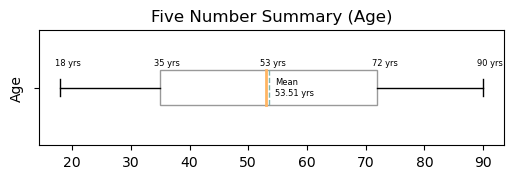

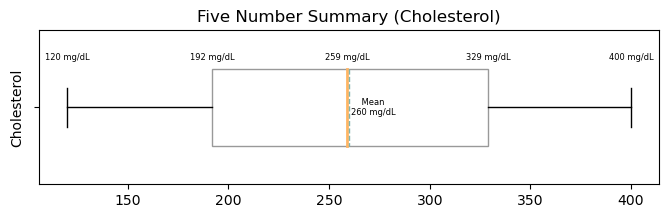

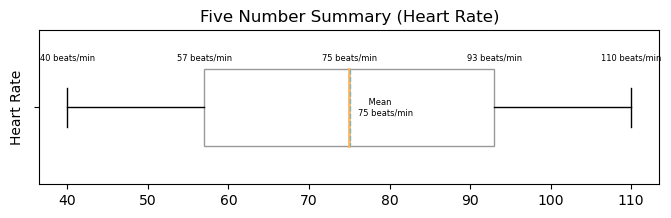

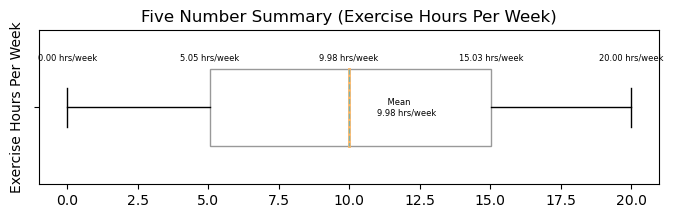

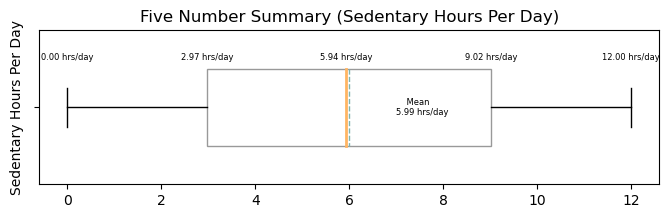

In [44]:
#Distributions:

#1- Five Number Summary (Age)
plt.subplots(figsize = (6,1.5))

sns.boxplot(x=df.Age,showmeans=True,meanline=True,showcaps = True, color="white", width=.3,boxprops={"linewidth": 1},
            medianprops={ "color" : "#ffb563","linewidth": 2},whiskerprops={"color": "black", "linewidth": 1},
            capprops={"color": "black", "linewidth": 1},meanprops = {"color": "#80B4ae","linewidth": 1 },autorange=True)

for i, v in enumerate(df_stats.iloc[[3,4,5,6,7],0]):
  plt.text(v-1,-.25,f'{v:.0f} yrs', ha='left', va='top',fontsize=6)
for k, l in enumerate(df_stats.iloc[[1],0]):
  plt.text(l+1,0,f'Mean\n{l:.2f} yrs', ha='left', va='center',fontsize=6)

plt.ylabel('Age')
plt.xlabel(None)
plt.title('Five Number Summary (Age)')
plt.show();


#2- Five Number Summary (Cholesterol)
plt.subplots(figsize = (8,2))

sns.boxplot(x=df.Cholesterol,showmeans=True,meanline=True,showcaps = True, color="white", width=.5,
            medianprops={ "color" : "#ffb563","linewidth": 2},boxprops={"linewidth": 1},whiskerprops={"color": "black", "linewidth": 1},
            capprops={"color": "black", "linewidth": 1},meanprops = {"color": "#80B4ae","linewidth": 1 })

for i, v in enumerate(df_stats.iloc[[3,4,5,6,7],1]):
  plt.text(v,-.35,f'{v:.0f} mg/dL', ha='center', va='top',fontsize=6)
for k, l in enumerate(df_stats.iloc[[1],1]):
  plt.text(l+1,0,f'    Mean\n{l:.0f} mg/dL', ha='left', va='center',fontsize=6)

plt.ylabel('Cholesterol')
plt.xlabel(None)
plt.title('Five Number Summary (Cholesterol)')
plt.show();


#3- Five Number Summary (Heart Rate)
plt.subplots(figsize = (8,2))

sns.boxplot(x=df['Heart Rate'],showmeans=True,meanline=True,showcaps = True, color="white", width=.5,
            medianprops={ "color" : "#ffb563","linewidth": 2},boxprops={"linewidth": 1},whiskerprops={"color": "black", "linewidth": 1},
            capprops={"color": "black", "linewidth": 1},meanprops = {"color": "#80B4ae","linewidth": 1 })

for i, v in enumerate(df_stats.iloc[[3,4,5,6,7],2]):
  plt.text(v,-.35,f'{v:.0f} beats/min', ha='center', va='top',fontsize=6)
for k, l in enumerate(df_stats.iloc[[1],2]):
  plt.text(l+1,0,f'    Mean\n{l:.0f} beats/min', ha='left', va='center',fontsize=6)

plt.ylabel('Heart Rate')
plt.xlabel(None)
plt.title('Five Number Summary (Heart Rate)')
plt.show();


#4- Five Number Summary (Exercise Hours Per Week)
plt.subplots(figsize = (8,2))

sns.boxplot(x=df['Exercise Hours Per Week'],showmeans=True,meanline=True,showcaps = True, color="white", width=.5,
            medianprops={ "color" : "#ffb563","linewidth": 2},boxprops={"linewidth": 1},whiskerprops={"color": "black", "linewidth": 1},
            capprops={"color": "black", "linewidth": 1},meanprops = {"color": "#80B4ae","linewidth": 1 })

for i, v in enumerate(df_stats.iloc[[3,4,5,6,7],3]):
  plt.text(v,-.35,f'{v:.2f} hrs/week', ha='center', va='top',fontsize=6)
for k, l in enumerate(df_stats.iloc[[1],3]):
  plt.text(l+1,0,f'    Mean\n{l:.2f} hrs/week', ha='left', va='center',fontsize=6)

plt.ylabel('Exercise Hours Per Week')
plt.xlabel(None)
plt.title('Five Number Summary (Exercise Hours Per Week)')
plt.show();

#5- Five Number Summary (Sedentary Hours Per Day	)
plt.subplots(figsize = (8,2))

sns.boxplot(x=df['Sedentary Hours Per Day'],showmeans=True,meanline=True,showcaps = True, color="white", width=.5,
            medianprops={ "color" : "#ffb563","linewidth": 2},boxprops={"linewidth": 1},whiskerprops={"color": "black", "linewidth": 1},
            capprops={"color": "black", "linewidth": 1},meanprops = {"color": "#80B4ae","linewidth": 1 })

for i, v in enumerate(df_stats.iloc[[3,4,5,6,7],5]):
  plt.text(v,-.35,f'{v:.2f} hrs/day', ha='center', va='top',fontsize=6)
for k, l in enumerate(df_stats.iloc[[1],5]):
  plt.text(l+1,0,f'    Mean\n{l:.2f} hrs/day', ha='left', va='center',fontsize=6)

plt.ylabel('Sedentary Hours Per Day')
plt.xlabel(None)
plt.title('Five Number Summary (Sedentary Hours Per Day)')
plt.show();

In [12]:
df['h_rate']=np.where((220-df['Age'])*.6> df['Heart Rate'],'Low','Normal')
df['h_rate']=np.where((220-df['Age'])*.8< df['Heart Rate'],'High',df['h_rate'])
        